In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests


In [3]:
ruta = 'D:/uni/4º año/TFG-GitHub/GII_O_MA_22.07/2022-10-01/'

rutaSensor1 = ruta + 'sensor1.csv'
rutaSensor2 = ruta + 'sensor2.csv'
rutaSensor3 = ruta + 'sensor3.csv'
rutaSensor4 = ruta + 'sensor4.csv'
rutaSensor5 = ruta + 'sensor5.csv'
rutaSensor6 = ruta + 'sensor6.csv'
rutaSensor7 = ruta + 'sensor7.csv'
rutaSensor8 = ruta + 'sensor8.csv'
rutaPluviometro = ruta + 'pluviometro.csv'

sensor1 = pd.read_csv(rutaSensor1)
sensor2 = pd.read_csv(rutaSensor2)
sensor3 = pd.read_csv(rutaSensor3)
sensor4 = pd.read_csv(rutaSensor4)
sensor5 = pd.read_csv(rutaSensor5)
sensor6 = pd.read_csv(rutaSensor6)
sensor7 = pd.read_csv(rutaSensor7)
sensor8 = pd.read_csv(rutaSensor8)
pluviometro = pd.read_csv(rutaPluviometro)

sensores = [sensor1, sensor2, sensor3, sensor4, sensor5, sensor6, sensor7, sensor8]

datosSensores = pd.concat(sensores, keys =['1', '2', '3', '4', '5', '6', '7', '8'])

datosSensores["Validez"] = 11111111


In [4]:
# 1 - sin comprobar
# 2 - no válidos
# 3 - válidos

bateria = datosSensores[datosSensores['bateria'] < 3.3]
# bateria

datosSensores.loc[datosSensores['bateria'] < 3.3, 'Validez'] += 11111111
datosSensores.loc[(datosSensores['t_ext'].isnull()) & (datosSensores['Validez'] < 22222222), ['Validez']] += 10000000
datosSensores.loc[(datosSensores['h_ext'].isnull()) & (datosSensores['Validez'] < 22222222), ['Validez']] += 1000000
datosSensores.loc[(datosSensores['t_C_cal'].isnull()) & (datosSensores['Validez'] < 22222222), ['Validez']] += 100000
datosSensores.loc[(datosSensores['h_C_cal'].isnull()) & (datosSensores['Validez'] < 22222222), ['Validez']] += 10000
datosSensores.loc[(datosSensores['t_L_cal'].isnull()) & (datosSensores['Validez'] < 22222222), ['Validez']] += 1000
datosSensores.loc[(datosSensores['h_L_cal'].isnull()) & (datosSensores['Validez'] < 22222222), ['Validez']] += 100
datosSensores.loc[((datosSensores['h_C'].isnull()) | (datosSensores['h_C'] > 1000)) & (datosSensores['Validez'] < 22222222), ['Validez']] += 10
datosSensores.loc[((datosSensores['h_L'].isnull()) | (datosSensores['h_L'] > 1000)) & (datosSensores['Validez'] < 22222222), ['Validez']] += 1
datosSensores

ts                 fecha  bateria  t_ext  h_ext  t_C_cal  \
1 0       1664622404170  2022/10/01, 13:06:44    3.905   23.3   34.7      NaN   
  1       1664622100865  2022/10/01, 13:01:40    3.905   23.7   34.2      NaN   
  2       1664621804010  2022/10/01, 12:56:44    3.905   23.9   33.9      NaN   
  3       1664621494087  2022/10/01, 12:51:34    3.905   23.2   36.1      NaN   
  4       1664621190505  2022/10/01, 12:46:30    3.905   22.2   38.4      NaN   
...                 ...                   ...      ...    ...    ...      ...   
8 120004  1626862109506  2021/07/21, 12:08:29    4.095   37.4   25.2     24.0   
  120005  1626862007691  2021/07/21, 12:06:47    4.095   37.5   23.0     24.0   
  120006  1626861883142  2021/07/21, 12:04:43    4.095   37.6   25.0     24.0   
  120007  1626860375576  2021/07/21, 11:39:35    4.095   35.5   27.6     23.9   
  120008  1626860311857  2021/07/21, 11:38:31    4.095   35.3   27.6     23.9   

            h_C_cal  t_L_cal    h_L_cal      h_C    h_L   Validez  
1 0             NaN     16.7  21.840000  65535.0  317.0  11221121  
  1             NaN     16.7  21.840000  65535.0  317.0  11221121  
  2             NaN     16.7  21.840000  65535.0  317.0  11221121  
  3             NaN     16.7  21.840000  65535.0  317.0  11221121  
  4             NaN     16.7  21.840000  65535.0  317.0  11221121  
...             ...      ...        ...      ...    ...       ...  
8 120004  10.504202     24.5  26.341463    279.0  310.0  11111111  
  120005  10.504202     24.5  26.341463    279.0  310.0  11111111  
  120006  10.504202     24.5  26.341463    279.0  310.0  11111111  
  120007  10.504202     24.5  26.341463    279.0  310.0  11111111  
  120008  10.504202     24.5  26.341463    279.0  310.0  11111111  

[1059820 rows x 12 columns]

In [5]:
# Comprobación de la validez // Temporal
listaValidez = [int(x) for x in str(datosSensores.loc[('2', 0), 'Validez'])]
listaValidez

[1, 1, 2, 2, 1, 1, 2, 1]

In [6]:
# Sirve para revertir el orden de la tabla y cambiar el indice
reordenado = datosSensores.iloc[::-1]
# plt.plot(reordenado.bateria)
reordenado

ts                 fecha  bateria  t_ext  h_ext  t_C_cal  \
8 120008  1626860311857  2021/07/21, 11:38:31    4.095   35.3   27.6     23.9   
  120007  1626860375576  2021/07/21, 11:39:35    4.095   35.5   27.6     23.9   
  120006  1626861883142  2021/07/21, 12:04:43    4.095   37.6   25.0     24.0   
  120005  1626862007691  2021/07/21, 12:06:47    4.095   37.5   23.0     24.0   
  120004  1626862109506  2021/07/21, 12:08:29    4.095   37.4   25.2     24.0   
...                 ...                   ...      ...    ...    ...      ...   
1 4       1664621190505  2022/10/01, 12:46:30    3.905   22.2   38.4      NaN   
  3       1664621494087  2022/10/01, 12:51:34    3.905   23.2   36.1      NaN   
  2       1664621804010  2022/10/01, 12:56:44    3.905   23.9   33.9      NaN   
  1       1664622100865  2022/10/01, 13:01:40    3.905   23.7   34.2      NaN   
  0       1664622404170  2022/10/01, 13:06:44    3.905   23.3   34.7      NaN   

            h_C_cal  t_L_cal    h_L_cal      h_C    h_L   Validez  
8 120008  10.504202     24.5  26.341463    279.0  310.0  11111111  
  120007  10.504202     24.5  26.341463    279.0  310.0  11111111  
  120006  10.504202     24.5  26.341463    279.0  310.0  11111111  
  120005  10.504202     24.5  26.341463    279.0  310.0  11111111  
  120004  10.504202     24.5  26.341463    279.0  310.0  11111111  
...             ...      ...        ...      ...    ...       ...  
1 4             NaN     16.7  21.840000  65535.0  317.0  11221121  
  3             NaN     16.7  21.840000  65535.0  317.0  11221121  
  2             NaN     16.7  21.840000  65535.0  317.0  11221121  
  1             NaN     16.7  21.840000  65535.0  317.0  11221121  
  0             NaN     16.7  21.840000  65535.0  317.0  11221121  

[1059820 rows x 12 columns]

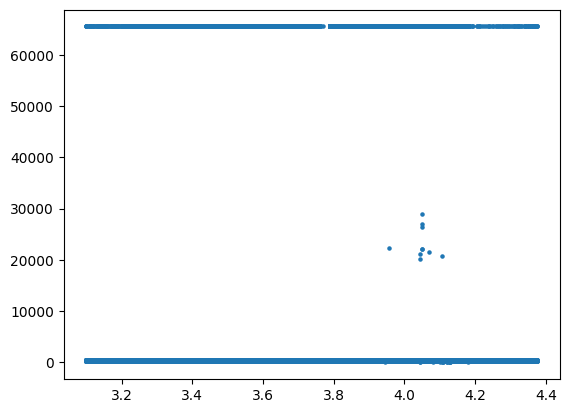

In [7]:
# Visualizacion de h_C
plt.scatter(datosSensores.bateria,datosSensores.h_C,5)

Se ve que hay datos con 65535, dichos datos no se consideran validos

In [8]:
datosSensores[datosSensores['t_C_cal'] > 50] 

ts                 fecha  bateria  t_ext  h_ext  t_C_cal  \
2 34447   1654087245813  2022/06/01, 14:40:45    3.770   31.9   20.4     54.6   
  34448   1654086942518  2022/06/01, 14:35:42    3.770   30.9   21.3     52.6   
  34452   1654085729372  2022/06/01, 14:15:29    3.770   31.4   20.4     53.2   
  34453   1654085426284  2022/06/01, 14:10:26    3.770   30.8   21.0     51.0   
  34454   1654085122965  2022/06/01, 14:05:22    3.770   30.7   21.1     52.6   
...                 ...                   ...      ...    ...    ...      ...   
6 115501  1628124547564  2021/08/05, 02:49:07    4.045   14.4   83.8     83.0   
  115971  1627981985489  2021/08/03, 11:13:05    4.045   24.1   41.1     52.8   
  116684  1627762991751  2021/07/31, 22:23:11    4.050   13.4   63.6     75.0   
  117120  1627630445054  2021/07/30, 09:34:05    4.050   18.9   71.8     75.0   
  117744  1627440264476  2021/07/28, 04:44:24    4.050   14.2   81.8     83.0   

          h_C_cal  t_L_cal  h_L_cal    h_C    h_L   Validez  
2 34447     10.77     19.9    40.20  282.0  371.0  11111111  
  34448     11.45     19.9    40.20  284.0  371.0  11111111  
  34452     11.11     19.9    40.54  283.0  372.0  11111111  
  34453     11.45     19.9    40.20  284.0  371.0  11111111  
  34454     11.11     19.9    40.20  283.0  371.0  11111111  
...           ...      ...      ...    ...    ...       ...  
6 115501    30.36     25.4    18.99  344.0  311.0  11111111  
  115971    30.03     24.5    18.67  343.0  310.0  11111111  
  116684    30.36     25.6    18.67  344.0  310.0  11111111  
  117120    30.69     26.3    18.67  345.0  310.0  11111111  
  117744    31.68     25.9    19.30  348.0  312.0  11111111  

[177 rows x 12 columns]

In [11]:
tsInicio = 1638662400 # 05-12-2021 0:00:00

# latS1 = 41.7568755
# lonS1 = -3.90430847

# latS2 = 41.7568155
# lonS2 = -3.9049433

# latS3 = 41.7565284
# lonS3 = -3.9043988

# latS4 = 41.7564729
# lonS4 = -3.9051304

# latS5 = 41.7563896
# lonS5 = -3.9044072

# latS6 = 41.7563108
# lonS6 = -3.9036934

# latS7 = 41.7560299
# lonS7 = -3.9037095

# latS8 = 41.7559649
# lonS8 = -3.9043562

latPV = 41.7571101
lonPV = -3.9043059

ts = tsInicio

latitudes = [41.7568755, 41.7568155, 41.7565284, 41.7564729, 41.7563896, 41.7563108, 41.7560299, 41.7559649]
longitudes = [-3.90430847, -3.9049433, -3.9043988, -3.9051304, -3.9044072, -3.9036934, -3.9037095, -3.9043562]
rutaSalidas = 'D:/uni/4º año/TFG-GitHub/GII_O_MA_22.07/datos_Sensor'
API_Key = '68e0e8dad6e8604f6faebb4b5ece6d39'

for i in range(8):

    with open(f'{str(rutaSalidas)}{i+1}.json', 'w') as f:
        lista = {'lista': []}
        json.dump(lista, f, indent = 4)

    while ts < 1664622404:
        with open(f'{str(rutaSalidas)}{i+1}.json', 'r') as f:
            data = json.load(f)

        with open(f'{str(rutaSalidas)}{i+1}.json', 'w') as f:
        
            url = 'https://history.openweathermap.org/data/2.5/history/city?lat=' + str(latitudes[i]) + '&lon=' + str(latitudes[i]) + '&type=hour&start=' + str(ts) +'&cnt=168&units=metric&appid=' + str(API_Key)
            for elemento in requests.get(url).json()['list']:
                data['lista'].append(elemento)
            json.dump(data, f, indent = 4)
        
        ts += 604800 # Una semana

    df = pd.read_json(f'{str(rutaSalidas)}{i+1}.json')
    df.to_csv(f'{str(rutaSalidas)}{i+1}.csv', index = None)
    ts = tsInicio

In [111]:
datos_prueba = pd.read_csv("D:/uni/4º año/TFG-GitHub/GII_O_MA_22.07/Datos_Sensor1.csv")
datos_prueba_dict = datos_prueba['lista'].to_dict()
ejemplo = eval(datos_prueba_dict[0])
ejemplo


{'dt': 1637884800,
 'main': {'temp': 3.05,
  'feels_like': -0.93,
  'pressure': 1014,
  'humidity': 89,
  'temp_min': 3.05,
  'temp_max': 3.05},
 'wind': {'speed': 4.67, 'deg': 342, 'gust': 10.88},
 'clouds': {'all': 99},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}]}

In [32]:
sensor1[(abs(sensor1['ts'] - ejemplo['dt'] * 1000) < 600000)] # 10min de diferencia # & (np.floor(sensor1['t_ext']) == np.floor(ejemplo['main']['temp']))] 

,ts,fecha,bateria,t_ext,h_ext,t_C_cal,h_C_cal,t_L_cal,h_L_cal,h_C,h_L
